In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
# Загрузите датасет transaction_data.csv. 
# Проверьте размер таблицы, 

df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-bogdanova/shared/homeworks/python_ds_miniprojects/5/transaction_data.csv')
df.shape

(5315, 3)

In [4]:
# Проверьте типы переменных,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [5]:
#  Проверьте число пропущенных значений и описательную статистику.
df.isna().sum()
# Вопрос: сколько в датасете пропущенных значений?

date           0
name           0
transaction    0
dtype: int64

In [6]:
#  Проверьте описательную статистику
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692


In [7]:
# Проверьте, какие значения принимает колонка transaction . 
# Сколько наблюдений относятся к тому или иному уровню? 
#  Визуализируйте результат с помощью барплота.
value_transaction  = df.groupby('transaction', as_index = False) \
    .agg({'date': 'count'}) \
    .sort_values('date', ascending = False) \
    .rename(columns ={'date': 'count'})
value_transaction

,transaction,count
2,successfull,3692
0,cancelled,1619
1,error,4


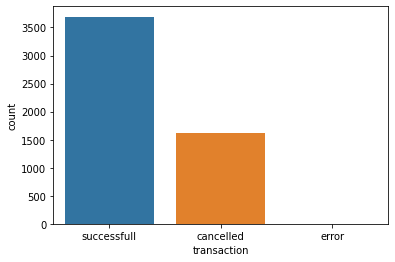

In [8]:
sns.barplot(data = value_transaction, x ='transaction', y = 'count')

In [9]:
# Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
# Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где
# по оси x – число транзакций
# по оси y – доля пользователей с таким числом транзакций
count_trans = df \
    .query('transaction =="successfull"') \
    .groupby('name', as_index = False) \
    .agg({'date':'count'}) \
    .rename(columns = {'date':'count'})
count_trans['count'].describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
Name: count, dtype: float64

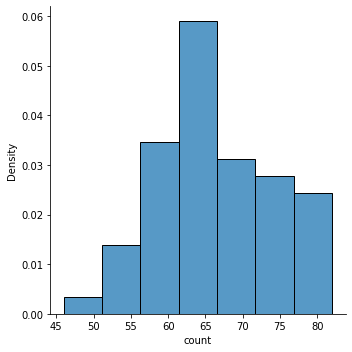

In [10]:
sns.displot(count_trans['count'], stat="density")

In [17]:
# К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

# столбцы – имена пользователей
# строки – минута времени осуществления операции (minute)
# значения – число совершённых операций
# Пропущенные значения заполните нулями.

# Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.
upd_df = pd.read_csv('transaction_data_updated.csv')
user_vs_minute_pivot = upd_df \
    .groupby(['minute', 'name'], as_index = False) \
    .agg({'transaction' : 'count'}) \
    .rename(columns = {'transaction' : 'count'}) \
    .pivot(index = 'minute', columns = 'name', values = 'count') \
     .fillna(0)
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [34]:
for_hist = upd_df \
    .groupby('name', as_index = False) \
    .agg({'date':'count'}) \
    .sort_values('name')
for_hist.head()

,name,date
0,Ekaterina_Fedorova,109
1,Ekaterina_Ivanova,83
2,Ekaterina_Lesnova,87
3,Ekaterina_Ozerova,110
4,Ekaterina_Petrova,100


In [35]:
# Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. 
# Результат сохраните в колонку true_minute. 
# Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).
upd_df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [43]:
upd_df.date = pd.to_datetime(upd_df.date)
upd_df['true_minute'] = upd_df.date.dt.hour * 60 + upd_df.date.dt.minute
upd_df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [39]:
for_hist2 = upd_df \
    .groupby('minute', as_index = False) \
    .agg({'date':'count'}) \
    .sort_values('minute')
for_hist2.head()

,minute,date
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57


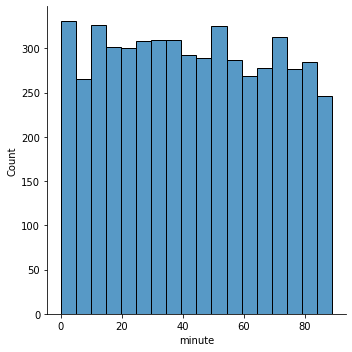

In [41]:
sns.displot(data = upd_df, x='minute')